# Author: AYUSHI MISHRA

### Task # 1 - Prediction Using Supervised Machine Learning

### Simple Linear Regression

Problem Statement: In this task, we have to predict the percentage of marks that a student is expected to score, based upon the number of hours they study.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Loaded Successfully")

Data Loaded Successfully


In [3]:
#Let's have a look at the data.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Changing the dimensions of independent variable
Hours = np.array([data.Hours]).reshape((-1,1))
Hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
Scores = np.array(data.Scores)
Scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [6]:
#Let's see the number of records
print("Our independent variable has shape of", Hours.shape)
print("Our dependent variable has shape of", Scores.shape)

Our independent variable has shape of (25, 1)
Our dependent variable has shape of (25,)


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data visualisation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


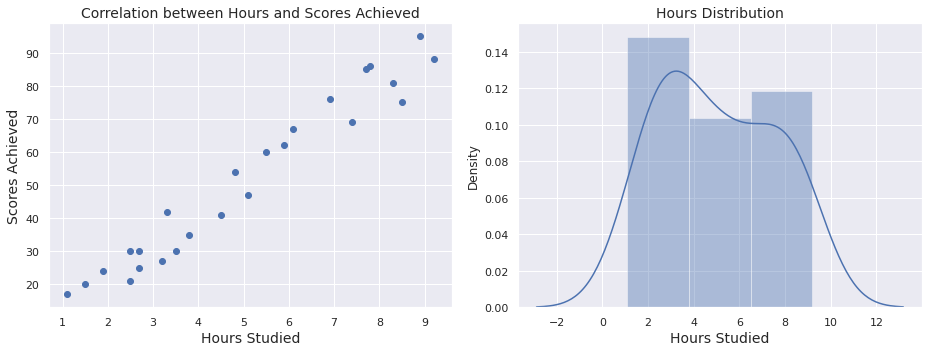

In [8]:
#Plot the distribution of scores
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(121)
plt.scatter(x = Hours, y = Scores)
plt.xlabel('Hours Studied', fontsize = 14)
plt.ylabel('Scores Achieved', fontsize = 14)
plt.title("Correlation between Hours and Scores Achieved", fontsize = 14)

plt.subplot(122)
sns.distplot(Hours)
plt.xlabel("Hours Studied", fontsize = 14)
plt.title("Hours Distribution", fontsize= 14)

plt.tight_layout()
plt.show()

The graph shows that there is a positive linear relation between the number of hours studied and percentage of score.

## Splitting the data

We have split the data into independant and dependant features(Hours, Scores). Then, we will divide them into training and test sets by using Scikit-Learn's built-in train_test_split() method with the ratio of 80:20.

In [9]:
from sklearn.model_selection import train_test_split

# split the features into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Hours, Scores, test_size = 0.20, random_state = 42)

## Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression

# initialize the model
model = LinearRegression()

# train the model on training set
model.fit(x_train, y_train)

print("Training complete.")

Training complete.


In [11]:
r_sq = model.score(Hours,Scores)
print("Coefficient Of Determination:", r_sq)

Coefficient Of Determination: 0.9528345204324373


In [12]:
print("Intercept:", model.intercept_)

Intercept: 2.826892353899737


In [13]:
print("Slope:", model.coef_)

Slope: [9.68207815]


## Plot the regression line

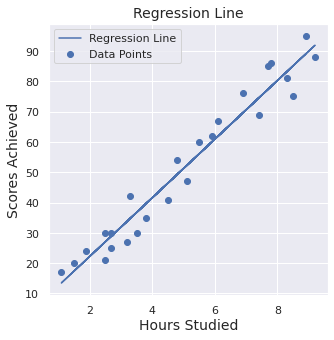

In [14]:
line = model.coef_ * Hours + model.intercept_

plt.rcParams['figure.figsize'] = (5,5)

plt.scatter(Hours, Scores, label = 'Data Points')
plt.plot(Hours, line, label = 'Regression Line')
plt.legend()
plt.xlabel("Hours Studied", fontsize = 14)
plt.ylabel("Scores Achieved", fontsize = 14)
plt.title("Regression Line", fontsize = 14)
plt.show()

## Evaluating the model

Make predictions on the test set and evaluate our model.

In [15]:
#make predictions on test set
prediction = model.predict(x_test)
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153



The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn.metrics import mean_absolute_error

# calculate the error
mae = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  3.9207511902099244


## Make predictions

What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = [[9.25]]

predict_score = model.predict(hours)
print("Hours:", hours[0][0])
print("Predicted Score:", predict_score[0])

Hours: 9.25
Predicted Score: 92.38611528261494
